In [1]:
#Import relevant dataset
import pickle as pk
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Read the dataframe
authordf = pd.read_pickle("disambiguated-author-dataframe-1991-2010-v2.pkl")

In [3]:
#Creat a new column "disambafflist" (referring to disambiguated affliation list) to store cleaned affliation names
nrow = len(authordf['paperlist'])
authordf['disambafflist'] = pd.Series(np.random.randn(nrow), index=authordf.index)

authordf['afflistnoand'] = pd.Series(np.random.randn(nrow), index=authordf.index)

In [4]:
#Check the dataframe
authordf.head()

,paperlist,paperdict,numpapers,yearsactive,numyearsactive,firstyear,lastyear,careerlength,numpapersperyear,coauthors,...,affiliationlist,numaffiliations,codes,numuniquecodes,numcodesperpaper,journals,numuniquejournals,affiliationbyyear,disambafflist,afflistnoand
(carol);chui-ha,[0666229],"{u'0666229': [u'2000', u'English', [u'Gaisford...",1,[2000],1,2000,2000,1,1.0,"[Chui-Ha, (Carol) Lau, Gaisford, James D.]",...,[U Calgary],1,[Chemicals; Rubber; Drugs; Biotechnology_(L650...,5,5.0,[Estey Centre Journal of International Law and...,1,{u'2000': [u'U Calgary']},-1.925849,-1.149732
-ng;a-n,[0300217],"{u'0300217': [u'1993', u'English', [u'Hazari, ...",1,[1993],1,1993,1993,1,1.0,"[Hazari, Bharat R., A-Ng]",...,[La Trobe U],1,"[Sports; Gambling; Recreation; Tourism_(L830),...",2,2.0,[International Review of Economics and Finance],1,{u'1993': [u'La Trobe U']},0.882298,1.677675
.;b. kamaladev,[1113397],"{u'1113397': [u'2009', u'English', [u'B. Kamal...",1,[2009],1,2009,2009,1,1.0,[B. Kamaladevi],...,"[Annamalai U, TamilNadu]",1,"[Advertising_(M370), Business Economics_(M210)...",3,3.0,[Romanian Economic Journal],1,"{u'2009': [u'Annamalai U, TamilNadu']}",-0.374636,-0.353353
.s.;u.s. department of labo,[0800526],"{u'0800526': [u'2005', u'English', [u'U.S. Dep...",1,[2005],1,2005,2005,1,1.0,[U.S. Department of Labor],...,[Unlisted],1,"[Wages, Compensation, and Labor Costs: Public ...",4,4.0,[Economic and Financial Review],1,{u'2005': [u'Unlisted']},-2.053571,0.372394
;afxentiou,[0325794],"{u'0325794': [u'1993', u'English', [u'Afxentio...",1,[1993],1,1993,1993,1,1.0,"[Serletis, Apostolos, Afxentiou, Panos C.]",...,[U Calgary],1,[International Investment; Long-term Capital M...,2,2.0,[Economia Internazionale],1,{u'1993': [u'U Calgary']},-1.277853,-0.296810


In [5]:
nrow

215521

In [6]:
#This code simply documents the limited processing I've subjected the insitution data to
processedaffs = []
for a in authordf.transpose():
    afflist = authordf['affiliationlist'][a]
    newnamelist = []
    for i in afflist:
        name = i
        
        # removing punctuation
        name = name.lower()
        #name = name.replace(","," ") #comment this line, remove ', ' comma space ot just comma
        name = name.replace("." , "")
        name = name.replace("&" , " and ")
        name = name.replace('\"', "")
        name = name.replace('\'', "")
        name = name.replace('\\', " ")
        name = name.replace('\/', " ")
        name = name.replace('(',' ')
        name = name.replace(')',' ')
        name = name.replace('[',' ')
        name = name.replace(']',' ')
        name = name.replace('{',' ')
        name = name.replace('}',' ')
        name = name.replace("  "," ")
        name = name.replace("  "," ")
        name = name.replace("  "," ")
        name = name.replace("  "," ")
        name = name.replace("  "," ")
        name = name.replace("  "," ")
        
        # the following are issues identified using the list of the top ~560 institutions
        name = name.replace('london school of economics','london school of econ')
        name = name.replace('va polytechnic institute & state u','va polytechnic institute')
        name = name.replace('va polytechnic institute and state u','va polytechnic institute')
        name = name.replace('international monetary fund','imf')
        name = name.replace('bar-ilan u','bar ilan u')
        name = name.replace('birkbeck college u london','birkbeck college')
        name = name.replace('international food policy research institute','ifpri')
        name = name.replace('london school of econ and political science','london school of econ')
        name = name.replace('norwegian school of economics','norwegian school of econ')
        name = name.replace('norwegian school of econ & business administration','norwegian school of econ')
        name = name.replace('norwegian school of management','norwegian school of econ')
        name = name.replace('rand corporation','rand')
        name = name.replace('stockholm school of economics','stockholm school of econ')
        name = name.replace('tel-aviv u','tel aviv u')
        name = name.replace('u carlos iii de madrid','u carlos iii madrid')
        name = name.replace('u e anglia','u east anglia')
        name = name.replace('u new s wales','u new south wales')
        name = name.replace('us bureau of labor statistics', 'us bls')
        name = name.replace('us department of agriculture', 'usda')
        name = name.replace('aarhus school of business','aarhus u')
        name = name.replace('catholic u leuven','catholic u louvain')
        name = name.replace('cesifo munich','cesifo')
        name = name.replace('erasmus u rotterdam','erasmus u')
        name = name.replace('european u institute florence','european u institute')
        name = name.replace('hebrew u jerusalem','hebrew u')
        name = name.replace('hoover institution','hoover institution stanford u')
        name = name.replace('hoover institution stanford u stanford u','hoover institution stanford u')
        name = name.replace('institute for fiscal studies london','institute for fiscal studies')
        name = name.replace('ifs','institute for fiscal studies')
        name = name.replace('iza bonn','iza')
        name = name.replace('new school for social research','new school u')
        name = name.replace('queen s u kingston ontario','queen s u kingston')
        name = name.replace('u paris i pantheon-sorbonne','u paris i')
        name = name.replace('eurequa u paris i','u paris i')
        name = name.replace('u southern ca los angeles','u southern ca')
        name = name.replace('u toulouse i','u toulouse')
        name = name.replace('washington u in st louis','washington u')
        name = name.replace('gremaq','u toulouse')
        name = name.replace('ifpri washington dc','ifpri')
        name = name.replace("institution of technology", 'iot')
        name = name.replace('federal reserve system', 'federal reserve')
        name = name.replace('federal reserve board', 'federal reserve')
        name = name.replace('bureau of labor statistics us department', 'us bls')
        name = name.replace('bureau of labor statistics', 'us bls')
        name = name.replace('us bls of labor', 'us bls')
        name = name.replace('us us social security administration', 'us social security administration')
        name = name.replace('bucharest academy of economic studies', 'academy of economic studies bucharest')
        name = name.replace('social security administration','us social security administration')
        name = name.replace('maastricht u', 'u maastricht')
        name = name.replace('pakistan institute of development econ islamabad', 'pakistan institute of development econ')
        name = name.replace('u newcastle upon tyne', 'u newcastle')
        name = name.replace('u tx', 'u tx austin')
        name = name.replace('newcastle u', 'u newcastle')
        name = name.replace('utrecht', 'utrecht u')
        name = name.replace('lund u', 'u lund')
        name = name.replace('u tx austin austin', 'u tx austin')
        name = name.replace('u autonoma barcelona', 'u autonoma de barcelona')
        name = name.replace('banca ditalia', 'bank of italy')
        name = name.replace('lancaster u', 'u lancaster')
        name = name.replace('u utrecht', 'utrecht')
        name = name.replace('wharton school u pa', 'u pa')
        name = name.replace('durham u', 'u durham')
        name = name.replace('athens u econ and business', 'athens u economics and business')
        name = name.replace('u padova', 'u padua')
        name = name.replace('yale law school', 'yale u')
        name = name.replace('u natal', 'u kwazulu-natal')
        name = name.replace('u gothenburg', 'goteborg u')
        name = name.replace('institute of econ u copenhagen', 'u copenhagen')
        name = name.replace('banco de espana', 'bank of spain')
        name = name.replace('institute of econ academia sinica', 'institute of economics academia sinica')
        name = name.replace('u firenze', 'u florence')
        name = name.replace('center tilburg u', 'tilburg u')
        name = name.replace('urban institute washington dc', 'urban institute')
        name = name.replace('southern il u carbondale', 'southern il u')
        name = name.replace('kings college u london', 'kings college london')
        name = name.replace('econometric institute erasmus u', 'erasmus u')
        name = name.replace('u quebec montreal', 'u quebec')
        name = name.replace('rand santa monica ca', 'rand')
        name = name.replace('ghent u', 'u ghent')
        name = name.replace('u genoa', 'u genova')
        name = name.replace('imf institute', 'imf')
        name = name.replace('u s fl', 'u south fl')
        name = name.replace('institute of policy and planning sciences u tsukuba', 'u tsukuba')
        name = name.replace('u ne omaha', 'u ne')
        name = name.replace('oecd', 'oecd paris')
        name = name.replace('u nv', 'uv las vegas')
        name = name.replace('u seville', 'u sevilla')
        name = name.replace('economic research service usda', 'usda')
        name = name.replace('aarhus u', 'u aarhus')
        name = name.replace('queen mary college u london', 'queen mary u london')
        name = name.replace('cambridge u', 'u cambridge')
        name = name.replace('u tx-pan american', 'u tx pan american')
        
        name = name.strip()
        
        # there are three ways that different journals indicate missing affiliations
        if name == 'missing':
            name = ''
        elif name == 'unlisted':
            name = ''
        newnamelist.append(name) 
    processedaffs.append(newnamelist)
    
authordf['disambafflist'] = processedaffs
# assign the new name to the new column
        

In [7]:
#Only keeps the author who has more than one listed affiliations
newauthordf = authordf[authordf['disambafflist'].map(len) > 1]

In [8]:
#check the new dataframe
newauthordf.head()

,paperlist,paperdict,numpapers,yearsactive,numyearsactive,firstyear,lastyear,careerlength,numpapersperyear,coauthors,...,affiliationlist,numaffiliations,codes,numuniquecodes,numcodesperpaper,journals,numuniquejournals,affiliationbyyear,disambafflist,afflistnoand
a.;abbott,"[0588692, 0513160, 0400048, 0422137, 0618667]","{u'0422137': [u'1997', u'English', [u'Abbott, ...",5,"[1999, 2002, 2000, 1997, 1996]",5,1996,2002,7,0.714286,"[Seddighi, H. R., De Vita, G., Armistead, Chri...",...,"[U Sunderland, St Peter's Campus, Sunderland B...",4,[Metals and Metal Products; Cement; Glass; Cer...,6,1.200000,"[Applied Economics, Economic Issues]",2,"{u'1999': [u'U Sunderland'], u'2002': [u'Oxfor...","[u sunderland, st peters campus, sunderland bu...",-1.063087
a.;abdul kalam,"[0743293, 0866863, 0728163, 0833297]","{u'0728163': [u'2003', u'English', [u'Abdul Ka...",4,"[2003, 2006, 2004, 2005]",4,2003,2006,4,1.000000,"[Abdul Kalam, A. P. J.]",...,"[Government of India, Government, India, Offic...",4,"[Models of Political Processes: Rent-seeking, ...",9,2.250000,[Finance India],1,"{u'2003': [u'Office of President of India'], u...","[government of india, government, india, offic...",-0.016601
a.;adair,"[1126382, 0535621]","{u'1126382': [u'2010', u'English', [u'Adair, A...",2,"[2000, 2010]",2,2000,2010,11,0.181818,"[Adair, A., Lloyd, M. G., Berry, J., McGreal, ...",...,"[Built Environment Research Institute, U Ulste...",2,"[Housing Supply and Markets_(R310), Business F...",6,3.000000,"[Urban Studies, Local Economy]",2,{u'2000': [u'Centre for Research on Property &...,"[built environment research institute, u ulste...",-0.007331
a.;adams,"[0497129, 0638811, 1011448, 0604092, 0669492, ...","{u'1011448': [u'2008', u'English', [u'Adams, A...",6,"[1997, 1999, 2002, 2003, 2001, 2008]",6,1997,2008,12,0.500000,"[Kaserman, David L., Naydenova, Budina, Ekelun...",...,"[College of Charleston, Gustavus Adolphus Coll...",3,"[Tort Law and Product Liability_(K130), Econom...",13,2.166667,"[Journal of Labor Research, Journal of Forensi...",6,"{u'1997': [u'Gustavus Adolphus College'], u'19...","[college of charleston, gustavus adolphus coll...",-1.587824
a.;ades,"[0534842, 0952911, 1009098, 1009089, 1120368, ...","{u'1009089': [u'2008', u'English', [u'Welton, ...",11,"[2000, 2006, 2007, 2008, 2009, 2010]",6,2000,2010,11,1.000000,"[Carlin, J. B., Spiegelhalter, D. J., Jones, D...",...,"[Centre for Health Economics, U York, Medical ...",6,"[Health: General_(I100), Related Disciplines_(...",10,0.909091,[Journal of the Royal Statistical Society: Ser...,4,"{u'2000': [u'Institute of Child Health, London...","[centre for health economics, u york, medical ...",-0.603388


In [9]:
nrow2 = len(newauthordf['paperlist'])
nrow2

74229

In [10]:
# Creat a unique affilition list and store that in a dictionary
authorinstitutions = []
for a in newauthordf.transpose():
    aff = newauthordf['disambafflist'][a]
    authorinstitutions.extend(aff)
print len(authorinstitutions)
uni1 = list(set(authorinstitutions))
print len(uni1)


uni1.append('nber')
affcodex1 = {}
for i in uni1:
    affcodex1[i] = i

294004
61591


In [12]:
foundand = 0
numfoundands = 0
founddup = 0
foundnondup = 0
founddupwithand = 0
totdups = 0
noluck = 0
partsfound = 0
index = 0

affiliationlist = uni1

for a in affcodex1:
    i = affcodex1[a]
    if type(i) is list:
        i = ' '.join(i)
    partslist = []
    try:
        # split on ' and ' to create a list of parts
        parts = i.split(', ')
        for j in parts:
            subparts = j.split(' and ')
            partslist.extend(subparts)
            
            
        partsfound += len(partslist)
        partsaccountedfor = 0
        ding = 0
        doubleparts = []
        nogo = []
        dups = []
        if len(partslist) > 1:
            foundand += 1
            numfoundands += len(partslist) - 1
            prevind = 0
            for p in partslist:
                # some minor processing
                ind = partslist.index(p)
                i = p.lower()
                i = i.strip()
                # if found the institution, add it to the list
                if affiliationlist.count(i)>= 1:
                    dups.append(i)
                    founddup += 1
                    partsaccountedfor += 1
                # if didn't find it, then that could be for two reasons:
                #    1) it's not there: inst = "Texas A and M" -> no modification
                #    2) it's not there because it's an institution with "and" in the name, and there are more than one
                #          "Texas A and M and Harvard U" -> check both parts again, concatenating the two parts
                else: 
                    if ind - prevind <= 1:
                        doubleparts.append(i)
                        foundnondup += 1
                        nogo.append(i)
                    else:
                        nogo.append(i)
                        ding = 1
                prevind += 1
            if len(doubleparts) > 0:
                leftovers = None
                if len(doubleparts) == 1:
                    nogo.extend(doubleparts)
                    leftovers = doubleparts
                elif len(doubleparts) == len(partslist):
                    nogo.extend(doubleparts)
                else:
                    if len(doubleparts) < 4:
                        if len(doubleparts) == 2:
                            newtrya = doubleparts[0] + ', ' + doubleparts[1]
                            newtryb = doubleparts[0] + ' and ' + doubleparts[1]
                        else:
                            newtrya = doubleparts[0] + ', ' + doubleparts[1] + ', ' + doubleparts[2]
                            newtryb = doubleparts[0] + ' and ' + doubleparts[1] + ' and ' + doubleparts[2]
                            
                        if affiliationlist.count(newtrya)>= 1:
                            dups.append(newtrya)
                            founddupwithand += 1
                            founddup += 1
                            partsaccountedfor += len(doubleparts)
                        else:
                            nogo.append(newtrya)
                            leftovers = newtrya
                        
                        if affiliationlist.count(newtryb)>= 1:
                            dups.append(newtryb)
                            founddupwithand += 1
                            founddup += 1
                            partsaccountedfor += len(doubleparts)
                        else:
                            nogo.append(newtryb)
                            leftovers = newtryb                          
                        
#                    else:
#                        tick = 0
#                        for i in doubleparts:
#                            if tick == 0:
#                                newtry = doubleparts[0]
#                            else:
#                                newtry = newtry + ', ' + i
#                                
#                            tick += 1
#                            if affiliationlist.count(newtry)>= 1:
#                                dups.append(newtry)
#                                partsaccountedfor += len(doubleparts)
#                        else:
#                            newtry1 = doubleparts[0] + ', ' + doubleparts[1]
#                            newtry2 = doubleparts[2] + ', ' + doubleparts[3]
#                            if len(doubleparts) > 4:
#                                left = []
#                                newtry3 = doubleparts[3] + ', ' + doubleparts[4]
#                                if affiliationlist.count(newtry3) >= 1:
#                                    dups.append(newtry3)
#                                    founddupwithand += 1
#                                    founddup += 1
#                                    partsaccountedfor += 2
#                                else:
#                                    nogo.append(newtry3)
#                                    leftovers.append(newtry3)
#                                    
#                            if affiliationlist.count(newtry1)>= 1:
#                                dups.append(newtry1)
#                                founddupwithand += 1
#                                founddup += 1
#                                partsaccountedfor += 2
#                            else:
#                                nogo.append(newtry1)
#                                
#                            if affiliationlist.count(newtry2)>= 1:
#                                dups.append(newtry2)
#                                founddupwithand += 1
#                                founddup += 1
#                                partsaccountedfor += 2
#                            else:
#                                nogo.append(newtry2)
    except AttributeError:
        if index < 5:
            index += 1
            print a
        
    dups = list(set(dups))
    nogo = list(set(nogo))
    totdups += len(dups)
    noluck += len(nogo)
    if len(dups) > 0:
        index += 1
        #if index < 1:
        #    print a
        #    print "old:"
        #    print affcodex2[a]
        #    print "dups:"
        #    print dups
        if partsaccountedfor == len(parts):
            affcodex1[a] = dups
        #if index < 1:
        #    print "new:"
        #    print affcodex2[a]
        #    print "not matched:"
        #    print nogo
        #    print "doubleparts:"
        #    print doubleparts
        if ding == 1:
            print a
            print nogo
print foundand
print founddup
print noluck
print partsfound

46284
55201
76145
130630


In [13]:
#foundand = 0
#numfoundands = 0
#founddup = 0
#foundnondup = 0
#founddupwithand = 0
#totdups = 0
#noluck = 0
#partsfound = 0
#index = 0

#affiliationlist = uni1

#for a in affcodex1:
#    i = affcodex1[a]
#    if type(i) is list:
#        i = ' '.join(i)
#    try:
#        # split on ' and ' to create a list of parts
#        parts = i.split(', ')
#        partsfound += len(parts)
#        partsaccountedfor = 0
#        ding = 0
#        doubleparts = []
#        nogo = []
#        dups = []
#        if len(parts) > 1:
#            foundand += 1
#            numfoundands += len(parts) - 1
#           prevind = 0
#            for p in parts:
#                # some minor processing
#                ind = parts.index(p)
#                i = p.lower()
#                i = i.strip()
#                # if found the institution, add it to the list
#                if affiliationlist.count(i)>= 1:
#                    dups.append(i)
#                    founddup += 1
#                    partsaccountedfor += 1
#                # if didn't find it, then that could be for two reasons:
#                #    1) it's not there: inst = "Texas A and M" -> no modification
#                #    2) it's not there because it's an institution with "and" in the name, and there are more than one
#                #          "Texas A and M and Harvard U" -> check both parts again, concatenating the two parts
#                else: 
#                    if ind - prevind <= 1:
#                        doubleparts.append(i)
#                        foundnondup += 1
#                        nogo.append(i)
#                    else:
#                        nogo.append(i)
#                        ding = 1
#                prevind += 1
#            if len(doubleparts) > 0:
#                leftovers = None
#                if len(doubleparts) == 1:
#                    nogo.extend(doubleparts)
#                    leftovers = doubleparts
#                elif len(doubleparts) == len(parts):
#                    nogo.extend(doubleparts)
#                else:
#                    if len(doubleparts) < 4:
#                        if len(doubleparts) == 2:
#                            newtry = doubleparts[0] + ', ' + doubleparts[1]
#                        else:
#                            newtry = doubleparts[0] + ', ' + doubleparts[1] + ', ' + doubleparts[2]
#                        if affiliationlist.count(newtry)>= 1:
#                            dups.append(newtry)
#                            founddupwithand += 1
#                            founddup += 1
#                            partsaccountedfor += len(doubleparts)
#                        else:
#                            nogo.append(newtry)
#                            leftovers = newtry
#                    else:
#                        tick = 0
#                        for i in doubleparts:
#                            if tick == 0:
#                                newtry = doubleparts[0]
#                            else:
#                                newtry = newtry + ', ' + i
#                            tick += 1
#                       if affiliationlist.count(newtry)>= 1:
#                            dups.append(newtry)
#                            partsaccountedfor += len(doubleparts)
#                        else:
#                            newtry1 = doubleparts[0] + ', ' + doubleparts[1]
#                            newtry2 = doubleparts[2] + ', ' + doubleparts[3]
#                            if len(doubleparts) > 4:
#                                left = []
#                                newtry3 = doubleparts[3] + ', ' + doubleparts[4]
#                                if affiliationlist.count(newtry3) >= 1:
#                                    dups.append(newtry3)
#                                    founddupwithand += 1
#                                    founddup += 1
#                                    partsaccountedfor += 2
#                                else:
#                                    nogo.append(newtry3)
#                                    leftovers.append(newtry3)
#                            if affiliationlist.count(newtry1)>= 1:
#                                dups.append(newtry1)
#                                founddupwithand += 1
#                                founddup += 1
#                                partsaccountedfor += 2
#                            else:
#                                nogo.append(newtry1)
#                            if affiliationlist.count(newtry2)>= 1:
#                                dups.append(newtry2)
#                                founddupwithand += 1
#                                founddup += 1
#                                partsaccountedfor += 2
#                            else:
#                                nogo.append(newtry2)
#    except AttributeError:
#        if index < 5:
#            index += 1
#            print a
#        
#    dups = list(set(dups))
#    nogo = list(set(nogo))
#    totdups += len(dups)
#    noluck += len(nogo)
#    if len(dups) > 0:
#        index += 1
#        #if index < 1:
#        #    print a
#        #    print "old:"
#        #    print affcodex2[a]
#        #    print "dups:"
#        #    print dups
#        if partsaccountedfor == len(parts):
#            affcodex1[a] = dups
#        #if index < 1:
#        #    print "new:"
#        #    print affcodex2[a]
#        #    print "not matched:"
#        #    print nogo
#        #    print "doubleparts:"
#        #    print doubleparts
#        if ding == 1:
#            print a
#            print nogo
#print foundand
#print founddup
#print noluck
#print partsfound

In [14]:
#foundand = 0
#numfoundands = 0
#founddup = 0
#foundnondup = 0
#founddupwithand = 0
#totdups = 0
#noluck = 0
#partsfound = 0
#index = 0

#affiliationlist = uni1

#for a in affcodex1:
#    # split on ' and ' to create a list of parts
#    parts = affcodex1[a].split(' and ')
#    partsfound += len(parts)
#    partsaccountedfor = 0
#    ding = 0
#    doubleparts = []
#    nogo = []
#    dups = []
#    if len(parts) > 1:
#        foundand += 1
#        numfoundands += len(parts) - 1
#        prevind = 0
#        for p in parts:
#            # some minor processing
#            ind = parts.index(p)
#            i = p.lower()
#            i = i.strip()
#            # if found the institution, add it to the list
#            if affiliationlist.count(i)>= 1:
#                dups.append(i)
#                founddup += 1
#                partsaccountedfor += 1
#            # if didn't find it, then that could be for two reasons:
#            #    1) it's not there: inst = "Texas A and M" -> no modification
#            #    2) it's not there because it's an institution with "and" in the name, and there are more than one
#            #          "Texas A and M and Harvard U" -> check both parts again, concatenating the two parts
#            else: 
#                if ind - prevind <= 1:
#                    doubleparts.append(i)
#                    foundnondup += 1
#                    nogo.append(i)
#                else:
#                    nogo.append(i)
#                    ding = 1
#            prevind += 1
#        if len(doubleparts) > 0:
#            leftovers = None
#            if len(doubleparts) == 1:
#                nogo.extend(doubleparts)
#                leftovers = doubleparts
#            elif len(doubleparts) == len(parts):
#                nogo.extend(doubleparts)
#            else:
#                if len(doubleparts) < 4:
#                    if len(doubleparts) == 2:
#                        newtry = doubleparts[0] + ' and ' + doubleparts[1]
#                    else:
#                        newtry = doubleparts[0] + ' and ' + doubleparts[1] + ' and ' + doubleparts[2]
#                    if affiliationlist.count(newtry)>= 1:
#                        dups.append(newtry)
#                        founddupwithand += 1
#                        founddup += 1
#                        partsaccountedfor += len(doubleparts)
#                    else:
#                        nogo.append(newtry)
#                        leftovers = newtry
#                else:
#                    tick = 0
#                    for i in doubleparts:
#                        if tick == 0:
#                            newtry = doubleparts[0]
#                        else:
#                            newtry = newtry + ' and ' + i
#                        tick += 1
#                    if affiliationlist.count(newtry)>= 1:
#                        dups.append(newtry)
#                        partsaccountedfor += len(doubleparts)
#                    else:
#                        newtry1 = doubleparts[0] + ' and ' + doubleparts[1]
#                        newtry2 = doubleparts[2] + ' and ' + doubleparts[3]
#                        if len(doubleparts) > 4:
#                            left = []
#                            newtry3 = doubleparts[4] + ' and ' + doubleparts[5]
#                            if affiliationlist.count(newtry3) >= 1:
#                                dups.append(newtry3)
#                                founddupwithand += 1
#                                founddup += 1
#                                partsaccountedfor += 2
#                            else:
#                                nogo.append(newtry3)
#                                leftovers.append(newtry3)
#                        if affiliationlist.count(newtry1)>= 1:
#                            dups.append(newtry1)
#                            founddupwithand += 1
#                            founddup += 1
#                            partsaccountedfor += 2
#                        else:
#                           nogo.append(newtry1)
#                        if affiliationlist.count(newtry2)>= 1:
#                            dups.append(newtry2)
#                            founddupwithand += 1
#                            founddup += 1
#                            partsaccountedfor += 2
#                        else:
#                            nogo.append(newtry2)
#
#    dups = list(set(dups))
#    nogo = list(set(nogo))
#    totdups += len(dups)
#    noluck += len(nogo)
#    if len(dups) > 0:
#        index += 1
#        #if index < 1:
#        #    print a
#        #    print "old:"
#        #    print affcodex2[a]
#        #    print "dups:"
#        #    print dups
#        if partsaccountedfor == len(parts):
#            affcodex1[a] = dups
#        #if index < 1:
#        #    print "new:"
#        #    print affcodex2[a]
#        #    print "not matched:"
#        #    print nogo
#        #    print "doubleparts:"
#        #    print doubleparts
#        if ding == 1:
#            print a
#            print nogo
#print foundand
#print founddup
#print noluck
#print partsfound

In [15]:
#Assign new affiliation names with 'and' seperated to the dataframe
disaffiliationlist = []
for a in newauthordf.transpose():
    disafflist = newauthordf['disambafflist'][a]
    disafflisttemp = []
    for i in disafflist:
        #if disaff is a string
        disaff = i
        if type(disaff) == str:
            if disaff in affcodex1:
                disaffname = affcodex1.get(disaff)
            else:
                disaffname = disaff
            disafflisttemp.append(disaffname)
        
        #if disaff is a list 
        elif type(disaff) == list:
                for j in disaff:
                    subdisaff = j
                    subdisafflisttemp = []
                    if subdisaff in affcodex1:
                        subdisaffname = affcodex1.get(subdisaff)
                        subdisafflisttemp.append(subdisaffname)
                    else: 
                        subdisaffname = subdisaff
                        subdisafflisttemp.append(subdisaffname)
                disafflisttemp.append(subdisaffname)

        #newauthordf['afflistnoand'][a] = disaffname
    disaffiliationlist.append(disafflisttemp)


In [16]:
len(disaffiliationlist)

74229

In [17]:
disaffiliationlist

[['u sunderland, st peters campus',
  'sunderland business school',
  'oxford brookes u',
  'u sunderland'],
 ['government of india',
  'government, india',
  'office of the president of india',
  'office of president of india'],
 ['built environment research institute, u ulster',
  'centre for research on property and planning, u ulster'],
 ['college of charleston', 'gustavus adolphus college', 'auburn u'],
 ['centre for health economics, u york',
  'medical research council health services research collaboration,u bristol',
  'medical research council health services research collaboration,bristol, uk',
  'u leicester',
  'u bristol',
  'institute of child health, london'],
 ['institute of cancer research, london',
  'international islamic u chittagong and islami bank bangladeshltd, dhaka',
  'loughborough u and u antwerp'],
 ['ussr academy of sciences', 'russian academy of sciences'],
 ['national centre for econ management and administration, ibadan,nigeria',
  'obafemi awolowo u',


In [18]:
newauthordf['afflistnoand'] = disaffiliationlist

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
newauthordf.head()

,paperlist,paperdict,numpapers,yearsactive,numyearsactive,firstyear,lastyear,careerlength,numpapersperyear,coauthors,...,affiliationlist,numaffiliations,codes,numuniquecodes,numcodesperpaper,journals,numuniquejournals,affiliationbyyear,disambafflist,afflistnoand
a.;abbott,"[0588692, 0513160, 0400048, 0422137, 0618667]","{u'0422137': [u'1997', u'English', [u'Abbott, ...",5,"[1999, 2002, 2000, 1997, 1996]",5,1996,2002,7,0.714286,"[Seddighi, H. R., De Vita, G., Armistead, Chri...",...,"[U Sunderland, St Peter's Campus, Sunderland B...",4,[Metals and Metal Products; Cement; Glass; Cer...,6,1.200000,"[Applied Economics, Economic Issues]",2,"{u'1999': [u'U Sunderland'], u'2002': [u'Oxfor...","[u sunderland, st peters campus, sunderland bu...","[u sunderland, st peters campus, sunderland bu..."
a.;abdul kalam,"[0743293, 0866863, 0728163, 0833297]","{u'0728163': [u'2003', u'English', [u'Abdul Ka...",4,"[2003, 2006, 2004, 2005]",4,2003,2006,4,1.000000,"[Abdul Kalam, A. P. J.]",...,"[Government of India, Government, India, Offic...",4,"[Models of Political Processes: Rent-seeking, ...",9,2.250000,[Finance India],1,"{u'2003': [u'Office of President of India'], u...","[government of india, government, india, offic...","[government of india, government, india, offic..."
a.;adair,"[1126382, 0535621]","{u'1126382': [u'2010', u'English', [u'Adair, A...",2,"[2000, 2010]",2,2000,2010,11,0.181818,"[Adair, A., Lloyd, M. G., Berry, J., McGreal, ...",...,"[Built Environment Research Institute, U Ulste...",2,"[Housing Supply and Markets_(R310), Business F...",6,3.000000,"[Urban Studies, Local Economy]",2,{u'2000': [u'Centre for Research on Property &...,"[built environment research institute, u ulste...","[built environment research institute, u ulste..."
a.;adams,"[0497129, 0638811, 1011448, 0604092, 0669492, ...","{u'1011448': [u'2008', u'English', [u'Adams, A...",6,"[1997, 1999, 2002, 2003, 2001, 2008]",6,1997,2008,12,0.500000,"[Kaserman, David L., Naydenova, Budina, Ekelun...",...,"[College of Charleston, Gustavus Adolphus Coll...",3,"[Tort Law and Product Liability_(K130), Econom...",13,2.166667,"[Journal of Labor Research, Journal of Forensi...",6,"{u'1997': [u'Gustavus Adolphus College'], u'19...","[college of charleston, gustavus adolphus coll...","[college of charleston, gustavus adolphus coll..."
a.;ades,"[0534842, 0952911, 1009098, 1009089, 1120368, ...","{u'1009089': [u'2008', u'English', [u'Welton, ...",11,"[2000, 2006, 2007, 2008, 2009, 2010]",6,2000,2010,11,1.000000,"[Carlin, J. B., Spiegelhalter, D. J., Jones, D...",...,"[Centre for Health Economics, U York, Medical ...",6,"[Health: General_(I100), Related Disciplines_(...",10,0.909091,[Journal of the Royal Statistical Society: Ser...,4,"{u'2000': [u'Institute of Child Health, London...","[centre for health economics, u york, medical ...","[centre for health economics, u york, medical ..."


In [20]:
#creat a list of affiliations that appear in the dataframe
finalafflist1 = []
for a in newauthordf.transpose():
    afflist = newauthordf['afflistnoand'][a]
    for name in afflist:
        finalafflist1.append(name)

In [21]:
finalafflist1

['u sunderland, st peters campus',
 'sunderland business school',
 'oxford brookes u',
 'u sunderland',
 'government of india',
 'government, india',
 'office of the president of india',
 'office of president of india',
 'built environment research institute, u ulster',
 'centre for research on property and planning, u ulster',
 'college of charleston',
 'gustavus adolphus college',
 'auburn u',
 'centre for health economics, u york',
 'medical research council health services research collaboration,u bristol',
 'medical research council health services research collaboration,bristol, uk',
 'u leicester',
 'u bristol',
 'institute of child health, london',
 'institute of cancer research, london',
 'international islamic u chittagong and islami bank bangladeshltd, dhaka',
 'loughborough u and u antwerp',
 'ussr academy of sciences',
 'russian academy of sciences',
 'national centre for econ management and administration, ibadan,nigeria',
 'obafemi awolowo u',
 'obafemi awolwo u',
 'obaf

In [22]:
finalafflist = []
for finalaff in finalafflist1:
    if type(finalaff) == str:
        finalafflist.append(finalaff)
    if type(finalaff) == list:
        for aff in finalaff:
            finalafflist.append(aff)

In [23]:
finalafflist

['u sunderland, st peters campus',
 'sunderland business school',
 'oxford brookes u',
 'u sunderland',
 'government of india',
 'government, india',
 'office of the president of india',
 'office of president of india',
 'built environment research institute, u ulster',
 'centre for research on property and planning, u ulster',
 'college of charleston',
 'gustavus adolphus college',
 'auburn u',
 'centre for health economics, u york',
 'medical research council health services research collaboration,u bristol',
 'medical research council health services research collaboration,bristol, uk',
 'u leicester',
 'u bristol',
 'institute of child health, london',
 'institute of cancer research, london',
 'international islamic u chittagong and islami bank bangladeshltd, dhaka',
 'loughborough u and u antwerp',
 'ussr academy of sciences',
 'russian academy of sciences',
 'national centre for econ management and administration, ibadan,nigeria',
 'obafemi awolowo u',
 'obafemi awolwo u',
 'obaf

In [24]:
#creat a new dataframe for author count
authorcountdf = pd.DataFrame(index=range(0,len(finalafflist)),columns=['affiliation'])
authorcountdf['affiliation'] = finalafflist
authorcountdf = authorcountdf.apply(pd.value_counts)
authorcountdf = authorcountdf.ix[1:]

In [25]:
authorcountdf.head()

,affiliation
u ca,1690
harvard u,1596
london school of econ,1436
world bank,1420
berkeley,1345


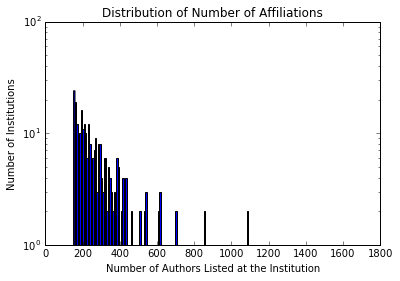

In [26]:
plt.hist(authorcountdf[authorcountdf.affiliation > 150]['affiliation'], log=True, bins =200)
plt.xlabel("Number of Authors Listed at the Institution")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Number of Affiliations")

In [27]:
len(authorcountdf[authorcountdf.affiliation > 75]['affiliation'])

600

In [28]:
newauthordf.to_pickle("disambiguated-author-dataframe-1991-2010-v2-modified.pkl")

In [29]:
#create a list that gives all of the affiliation of each author
finalafflist2 = []
for a in newauthordf.transpose():
    templist = []
    afflist = newauthordf['afflistnoand'][a]
    for name in afflist:
        if type(name) == str:
            templist.append(name)
        if type(name) == list:
            for aff in name:
                templist.append(aff)   
    finalafflist2.append(templist)
        
#take the unique value for each element(list) in this list
uniqueafflist = []
for sublst in finalafflist2:
    uniquelist = set(sublst)
    uniqueafflist.append(uniquelist)

#get the length of each list within unique affiliation list
uniqueafflistlength = []
for sublst in uniqueafflist:
    uniquelistlen = len(sublst)
    uniqueafflistlength.append(uniquelistlen)

In [30]:
affcountdf = pd.DataFrame(index=range(0,len(uniqueafflist)),columns=['affiliations','counts'])
affcountdf['affiliations'] = uniqueafflist
affcountdf['counts'] = uniqueafflistlength

In [31]:
affcountdf

,affiliations,counts
0,"{sunderland business school, oxford brookes u,...",4
1,"{government of india, office of president of i...",4
2,"{built environment research institute, u ulste...",2
3,"{college of charleston, gustavus adolphus coll...",3
4,"{centre for health economics, u york, medical ...",6
5,"{institute of cancer research, london, interna...",3
6,"{ussr academy of sciences, russian academy of ...",2
7,"{obafemi awolowo u, obafemi awolowo u, ile-ife...",4
8,"{institute of social studies, hague, u manitob...",5
9,{u lancaster},1


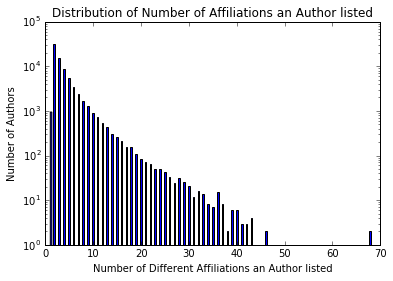

In [32]:
plt.hist(affcountdf['counts'], log=True, bins =200)
plt.xlabel("Number of Different Affiliations an Author listed")
plt.ylabel("Number of Authors")
plt.title("Distribution of Number of Affiliations an Author listed")